# UTSA CS 3793/5233: Assignment-1

Summer 2021


**Frank - Tyler - (zaf455)**






## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**. 
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(50 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [ ]:
# Add only your imports here
from google.colab import drive
import csv
# matlab imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# networkX
import networkx as nx
# priority queue for A*
from queue import PriorityQueue
# geopy
from geopy.distance import geodesic



In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"
drive.mount('/content/drive')
# open files
cities_file = open("/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Data/cities.csv")
distance_file = open("/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Data/distances.csv")
texas_pic = open("/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Data/texas_map.png")


Mounted at /content/drive


In [ ]:
# Load the graph data from the files

# variable for debugging purposes
debug = False
# open files
cities_file = open("/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Data/cities.csv")
distance_file = open("/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Data/distances.csv")
texas_pic = open("/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Data/texas_map.png")
# NodeClass
class Node:
  'Node for graph, contains city name, coordinates, list of edges'
  cityName = ''
  latitude = 0
  longitude = 0
  parent = None
  visited = False
  # an edge looks like: [startingNode, nextNode, dist]
  actions = []
  def __init__ (self, cityName, latitude, longitude):
    self.cityName = cityName
    self.latitude = latitude
    self.longitude = longitude
    self.parent = None
    self.actions = []
    self.visited = False

# Edge class
class Edge1:
  'Edge1 contains: start node, end node, distance'
  startpt = ''
  endpt = ''
  distance = 0
  def __init__ (self, startpt, endpt, distance):
    self.startpt = startpt
    self.endpt = endpt
    self.distance = distance

# List to contain all Nodes
listOfNodes = []
# Read in all City Nodes
for line in cities_file:
  line = line.rstrip()
  newLine = line.split(',')
  newNode = Node(newLine[0], newLine[1], newLine[2])
  'Debug statements'
  if(debug):
    # print(newNode.cityName)
    # print(newLine[0] + " lat:" + newLine[1] + " long:" + newLine[2])
    x=1
  listOfNodes.append(newNode)
#networkX
G = nx.Graph() 
for node in listOfNodes:
  G.add_node(node.cityName, cityName = node.cityName, latitude = node.latitude, longitude = node.longitude)
  if(debug): 
    print(node.cityName + " lat:" + str(node.latitude) + " long:" + str(node.longitude))

# List of edges
listOfEdges = []

# list of verts for graph searches
listofVerts = []

# Read in all Edges
for line in distance_file:
  line = line.rstrip()
  newLine = line.split(',')
  newEdge = Edge1(newLine[0], newLine[1], newLine[2])
  listOfEdges.append(newEdge)
  tup = [newLine[0], newLine[1], float(newLine[2])]
  listofVerts.append(tup)

for x in listOfEdges:
  G.add_edge(x.startpt, x.endpt, distance = x.distance)



Note for TA- you can click on the image to zoom in


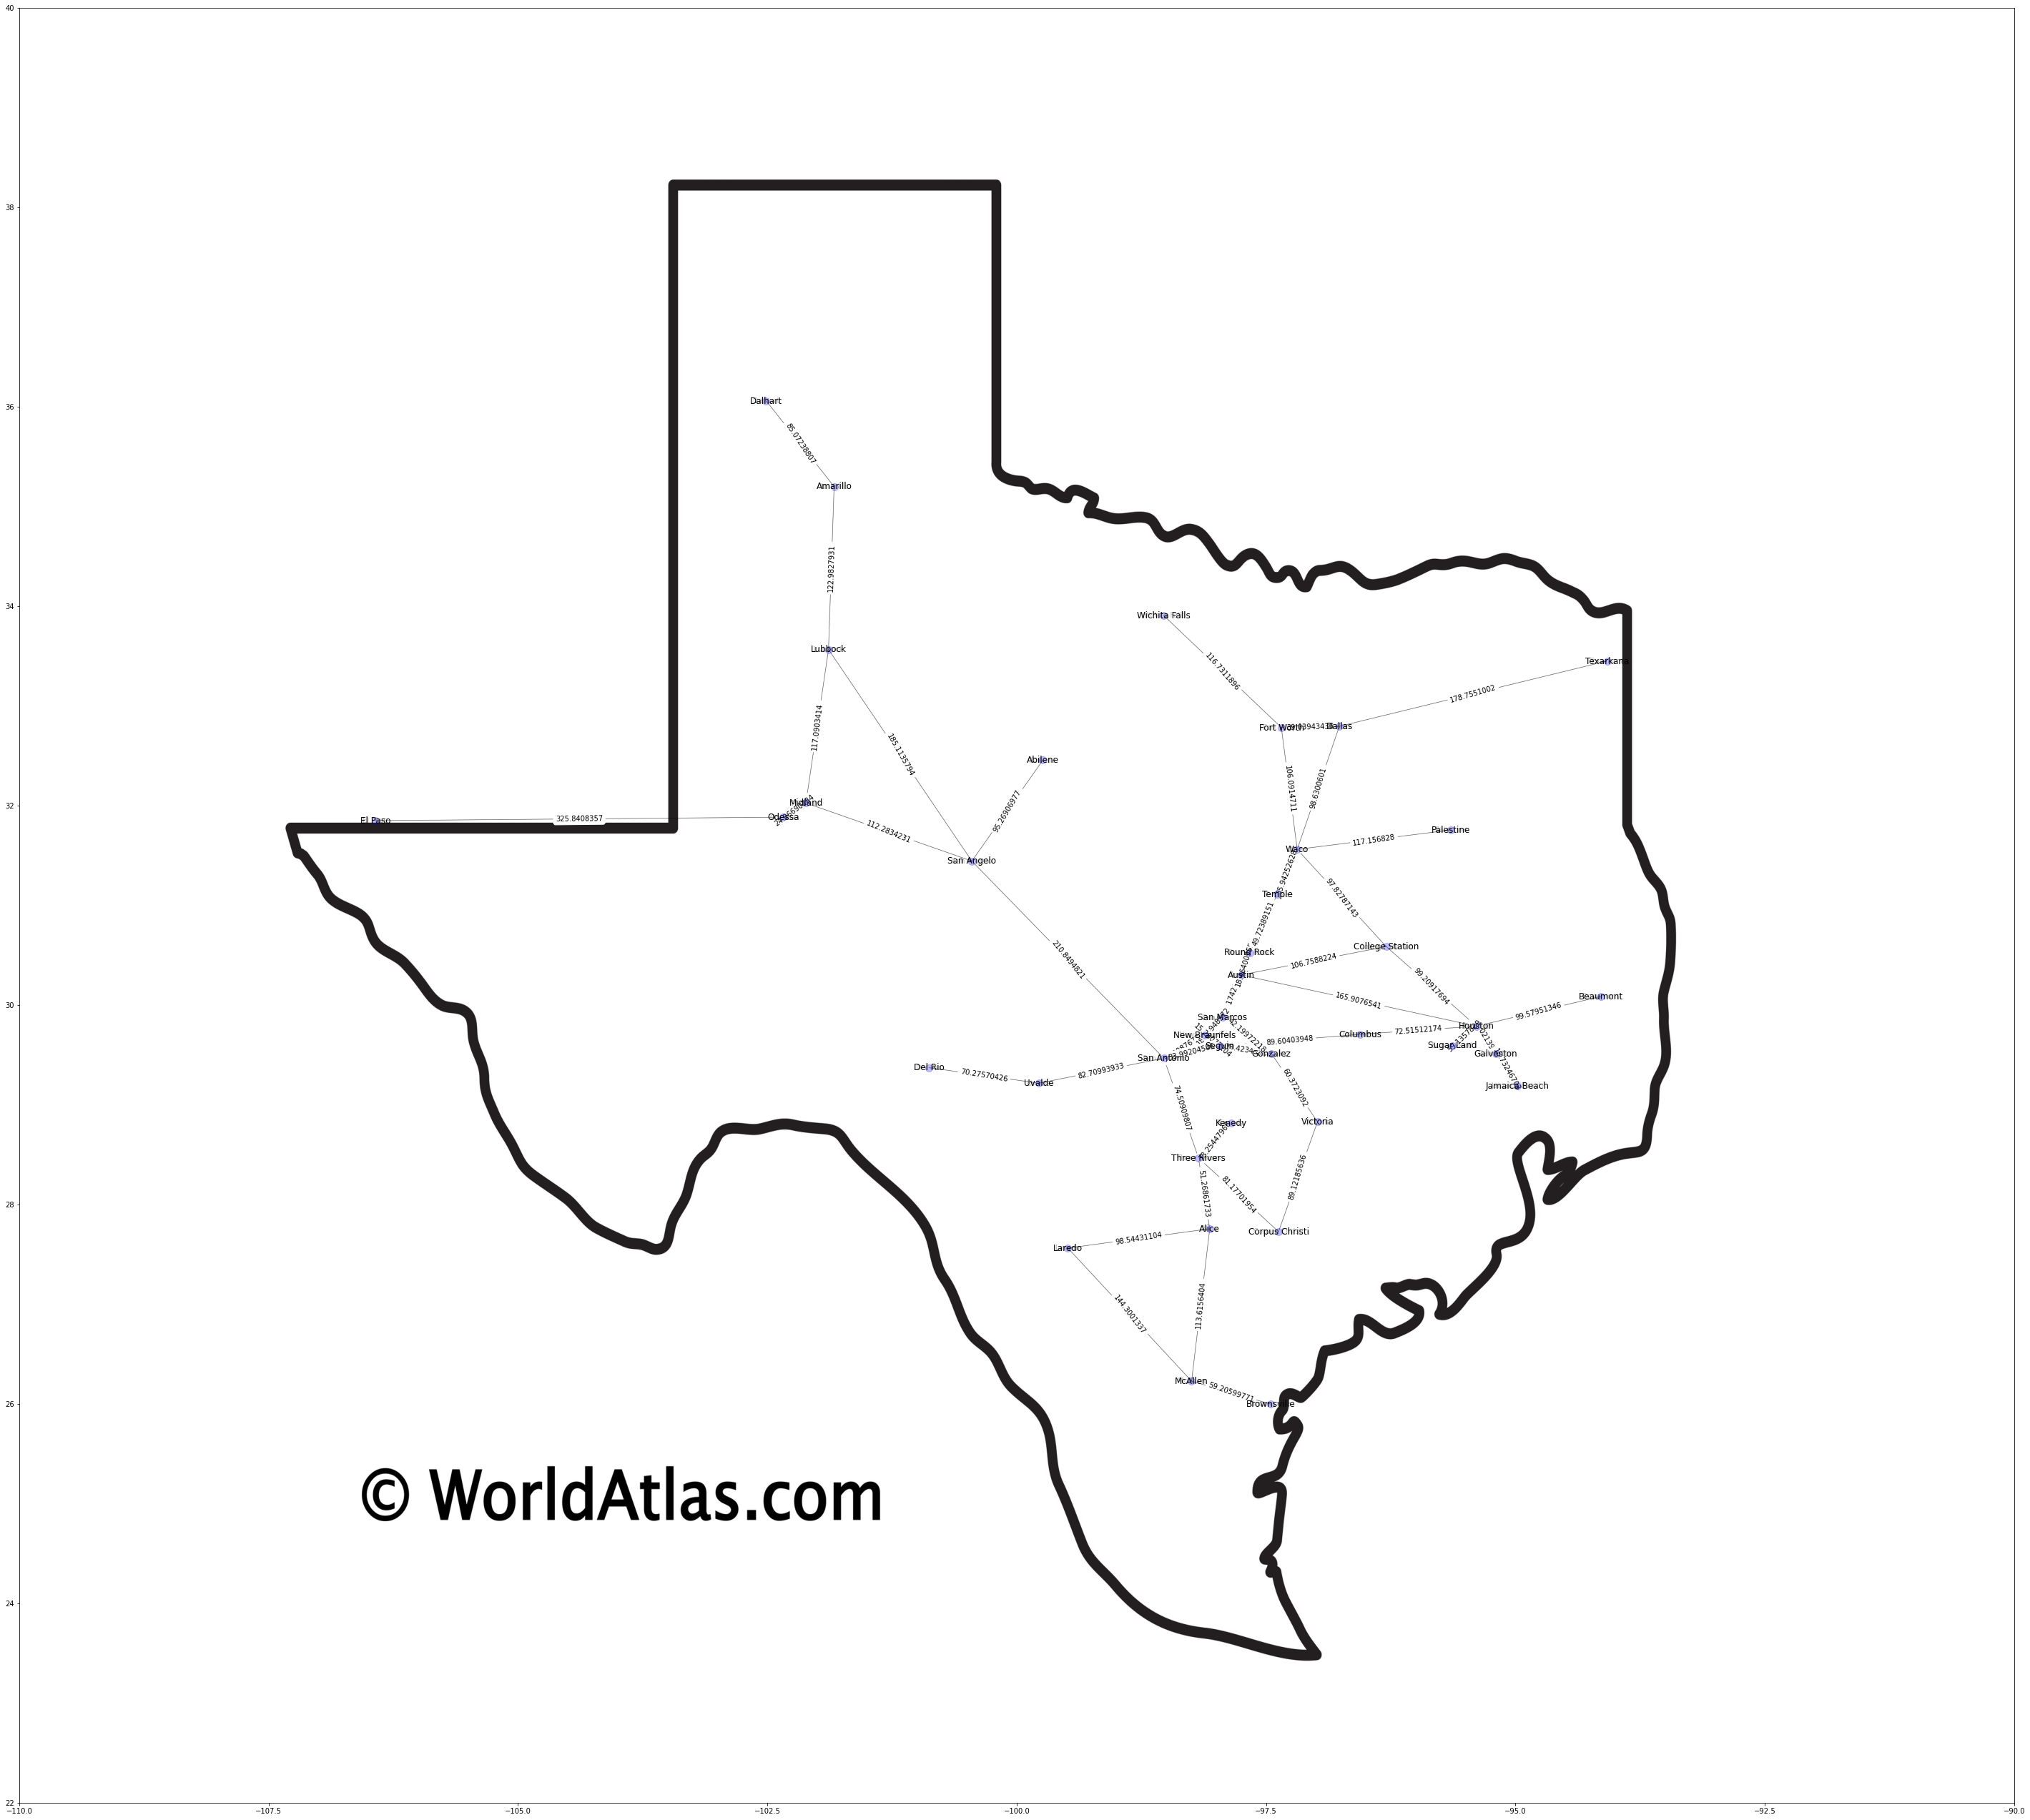

Note for TA- you can click on the image to zoom in


In [ ]:
# Display a 2D graph of the given data.
'''References:
https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db
'''
df = pd.DataFrame([node.cityName, node.latitude, node.longitude] for node in listOfNodes)
df.columns = ['city', 'latitude', 'longitude']
df.head()

pos = {n.cityName : (float(n.longitude), float(n.latitude)) for n in listOfNodes}
# This line sets the size of the figure displayed
plt.rcParams["figure.figsize"] = (50,50)
fig, ax = plt.subplots()
nodeOptions = {"node_size": 100, "alpha": 0.25, "node_color": 'b', "font_size": 10}
nx.draw(G, pos=pos, with_labels=True, ax=ax, **nodeOptions, )
nx.draw_networkx_labels(G, pos)
labels = nx.get_edge_attributes(G, 'distance')
nx.draw_networkx_edges(G, pos, width = 0.5, alpha = 0.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
plt.axis("on")
ax.set_xlim(-110,-90)
ax.set_ylim(22,40)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
texas = plt.imread("/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Data/texas_map.png")
ax.imshow(texas, extent=[-108,-92,22,40])
print('Note for TA- you can click on the image to zoom in')
plt.show()
print('Note for TA- you can click on the image to zoom in')

#Virus Spread - Uninformed Search Agent

##(50 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [ ]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
# Implementing BFS
# Vertex
class Vertex:
  def __init__(self, name, latitude, longitude):
    self.name = name
    self.latitude = latitude
    self.longitude = longitude
    # list of [endpt, wt]
    self.adj = []
    self.neighbors = {}
    self.visited = False
    self.PATHCOST = 0.0
    self.PREVIOUS = None
    self.H = 0.0

# Build Problem
class Problem:
  # Node
  INITIALSTATE = None
  PATHCOST = 0.0
  GOALSTATE = 'test'
  verts = {}
  # list of city names as explored by BFS, will print by i +". " + SOLUTION[i]
  SOLUTION = []

  def __init__(self, initState, pathcost, GOALSTATE=None):
    self.INITIALSTATE = initState
    self.PATHCOST = pathcost
    self.GOALSTATE = GOALSTATE
    self.verts = {}
    self.SOLUTION = []

  def add_vert(self, vert):
    if isinstance(vert, Vertex) and vert.name not in self.verts:
      self.verts[vert.name] = vert
      return True
    else:
      return False

  def get_straight_line_dist(self, orig):
    if orig == 'College Station':
      return 0
    currVert = self.verts[orig]
    currLocation = (currVert.latitude, currVert.longitude)
    destVert = self.verts['College Station']
    destLocation = (destVert.latitude, destVert.longitude)
    # print('distance from ' + orig + ' to college station: ' + str(geodesic(currLocation, destLocation).miles))
    return (geodesic(currLocation, destLocation).miles)

  # Add an edge, problem has an edge stored two ways- as a list and as a dict. 
  def add_edge2(self, e):
    if e.startpt in self.verts and e.endpt in self.verts:
      for x in self.verts:
        if self.verts[x].name == e.startpt and not any(e.endpt in item for item in self.verts[x].adj):
          pt = [e.endpt, float(e.distance), e.startpt]
          self.verts[x].adj.append(pt)
          self.verts[x].neighbors[e.endpt] = float(e.distance)
        if self.verts[x].name == e.endpt and not any(e.startpt in item for item in self.verts[x].adj):
          pt = [e.startpt, float(e.distance), e.endpt]
          self.verts[x].adj.append(pt)
          self.verts[x].neighbors[e.startpt] = float(e.distance)

  def getSolution(self, goalState):
    # Recreate the solution path by checking each node's previous node
    ans = self.verts[goalState].PREVIOUS
    l = [goalState]
    while ans:
      l.append(ans)
      tmp = self.verts[ans].PREVIOUS
      ans = tmp
    # Change list from goal state -> initial state to ===> initial state -> goal state ordering
    l.reverse()
    self.SOLUTION = l
    return l

  # Class methods
  # Goal test
  @classmethod
  def GOALTEST(self, n):
    # if all nodes visited, return True, else return False
    if n.name == 'test':
      return True
    else:
      return False

def BFS(p):
  # node = a node with a state = problem.initial-state, path-cost = 0
  n = p.INITIALSTATE
  p.PATHCOST = 0.0
  # if problem.goal-test(node.state) then return SOLUTION(node)
  # This is not implemented in this part as the solution is to explore all nodes
  if (p.GOALTEST(n)):
    return p.SOLUTION(n)
  frontier = [n]
  explored = []
  prevNode = n
  # loop do
  while True:
    # if EMPTY?(Frontier) then return failure
    if len(frontier) == 0:
      return  #failure if there is a goal state 
    # node = pop(frontier) #BFS is FIFO (position 0), DFS is LIFO (last element)
    currNode = frontier.pop(0)
    p.SOLUTION.append(currNode.name)
    # add to path cost
    # add node.STATE to explored
    currNode.visited = True
    explored.append(currNode)
    # for each action in problem.ACTIONS(node.STATE) do
    for a in currNode.adj:
      child = p.verts[a[0]]
      if frontier.count(child) == 0 and not child.visited:
        frontier.append(p.verts[child.name])
        p.PATHCOST = p.PATHCOST + a[1]

# Initialize the problem
p = Problem(None, 0.0) 
for v in listOfNodes:
  add_me = Vertex(v.cityName, v.latitude, v.longitude)
  p.add_vert(add_me)    
for e in listOfEdges:
  p.add_edge2(e)

# Set the INITIALSTATE to Three Rivers as described in the directions
p.INITIALSTATE = p.verts['Three Rivers'] 
# Do the problem:
BFS(p)
# Print the solution
print('BFS virus spread')
print('________________')
i = 1
for a in p.SOLUTION:
  print(str(i) + ". " + a)
  i = i + 1 
print('Total distance traveled by the virus: ' + str(p.PATHCOST))   


BFS virus spread
________________
1. Three Rivers
2. San Antonio
3. Corpus Christi
4. Alice
5. Kenedy
6. San Angelo
7. New Braunfels
8. Seguin
9. Uvalde
10. Victoria
11. Laredo
12. McAllen
13. Midland
14. Lubbock
15. Abilene
16. San Marcos
17. Gonzalez
18. Columbus
19. Del Rio
20. Brownsville
21. Odessa
22. Amarillo
23. Austin
24. Houston
25. El Paso
26. Dalhart
27. Round Rock
28. College Station
29. Beaumont
30. Galveston
31. Sugar Land
32. Temple
33. Waco
34. Jamaica Beach
35. Palestine
36. Fort Worth
37. Dallas
38. Wichita Falls
39. Texarkana
Total distance traveled by the virus: 3354.31992298


#Vaccine Transportation - Informed Search Agent

##(50 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print 

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [ ]:
# START OF PART 3********************************
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station'
# create new problem
p2 = Problem(None, 0.0)
# populate vertices
for v in listOfNodes:
  add_me = Vertex(v.cityName, v.latitude, v.longitude)
  p2.add_vert(add_me)
# populate edges
for e in listOfEdges:
  p2.add_edge2(e)

# update all verts in problem to have heuristic value
for cname in p2.verts:
  p2.verts[cname].H = p2.get_straight_line_dist(cname)

# set initial state
p2.INITIALSTATE = 'San Antonio'
p2.GOALSTATE = 'College Station'
p2.SOLUTION = []

# Functions for A*
# return list [distance, origin city]
def get_dist(currNode, dest):
  for edge in currNode.adj:
    if dest == edge[0]:
      return [edge[1], edge[2]]

# Return index if name exists in list pq
def findIdx(pq, name):
  x = [ind for ind in range(len(pq)) if name in pq[ind]]
  if x == []:
    return [False, 0]
  return [True, x[0]]

# Return True/False if name exists in list pq - used to see if node is in the frontier
def inFront(pq, name):
  x = [ind for ind in range(len(pq)) if name in pq[ind]]
  if x == []:
    return False
  return True

# x = [orig, wt, dest]
def getWeightOfEdge(child, currNode):
  for x in currNode.adj:
    if ((x[0] == currNode.name) and (x[2] == child.name)) or ((x[2] == currNode.name) and (x[0] == child.name)):
      return x[1]
  return 0.0
# End of Functions for A*

# Define A*
def ASTAR(p2):
  # node <- a node with state = problem.INITIAL-STATE, PATH-COST = 0
  n = p2.verts['San Antonio']
  # pq is Priority queue with items as: [f(n), cityname]
  pq = []
  pq.append([n.PATHCOST, n.name])
  explored = []
  while True:
    # if empty then return failure
    if len(pq) == 0:
      return 'failure'
    # pop first node on priority queue, since the priority queue is a list I get the Vertex then delete index 0
    currNode = p2.verts[pq[0][1]]
    del pq[0]
    # if problem.GOAL-TEST(node.STATE) then return SOLUTION
    if p2.GOALSTATE == currNode.name:
      p2.SOLUTION.append(currNode.name)
      p2.PATHCOST = p2.verts[p2.GOALSTATE].PATHCOST
      return p2.getSolution(p2.GOALSTATE)
    # add node to explored
    currNode.visited = True
    explored.append(currNode.name)

    # for each action in problem.actions(node.state) do - AKA expand a node once you reach it
    for neighbor in currNode.adj:
      # child <- child-node(problem, node, action)
      child = p.verts[neighbor[0]]
      # if child.state is not in explored or frontier then:
      # boolean values to simplify the if statement
      inFrontier = inFront(pq, child.name)
      inExplored = inFront(explored, child.name)
      # get f(x) = g(x) + h(x) where g(x) is pathcost so far and h(x) is straight line distance to the goal
      # Heuristic
      hOfX = p2.verts[neighbor[0]].H
      # Step cost
      gOfX = p2.verts[currNode.name].PATHCOST + p2.verts[currNode.name].neighbors[neighbor[0]]
      # res = f(x)
      res = gOfX + hOfX
      # child.PATHCOST = getWeightOfEdge(child, currNode)
      if ((not inFrontier) and (not inExplored)):
        p2.verts[neighbor[0]].PATHCOST = gOfX
        p2.verts[neighbor[0]].PREVIOUS = currNode.name
        pq.append([res, child.name])
        # sort the frontier by the distance value
        pq = sorted(pq, key=lambda k: [k[0]])
      # else if child.state in frontier with higher path-cost then replace that frontier node with child and update the new previous node
      elif inFrontier and (gOfX < p2.verts[child.name].PATHCOST):
        # Check to see if child is in frontier, returns [bool, value of index in frontier]
        idx = findIdx(pq, child.name)
        # If found, update the frontier with the new pathcost (h(x))
        if idx[0]:
          pq[idx[1]] = [res, child.name]
          p2.verts[child.name].PATHCOST = gOfX

# Complete Part 3 by calling A* with the new problem
ASTAR(p2)
# Print the solution
print()
print('A* Search Solution')
print('__________________')
i = 1
for city in p2.SOLUTION:
  print(str(i) + '. ' + city)
  i += 1

print('Total distance traveled to distribute vaccine: ' + str(p2.PATHCOST))


A* Search Solution
__________________
1. San Antonio
2. New Braunfels
3. San Marcos
4. Austin
5. College Station
Total distance traveled to distribute vaccine: 186.77450141


#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (50 points) Reading Data files & Creating a 2D Graph
*   (50 points) Virus Spread - Uninformed Search Agent
*   (50 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



